### Project your image dataset (raw data) into 2 dimensions using PCA, and visualize/plot the dataset with color codes depending on the classes. In addition, plot the 2 eigenvectors.

In [7]:
# Librerías:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

- Load data from img dir

In [4]:
path = "img/"

images = []
labels = []

for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta): 
        if archivo.endswith(".png"):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

- t-SNE

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

- Data visualization

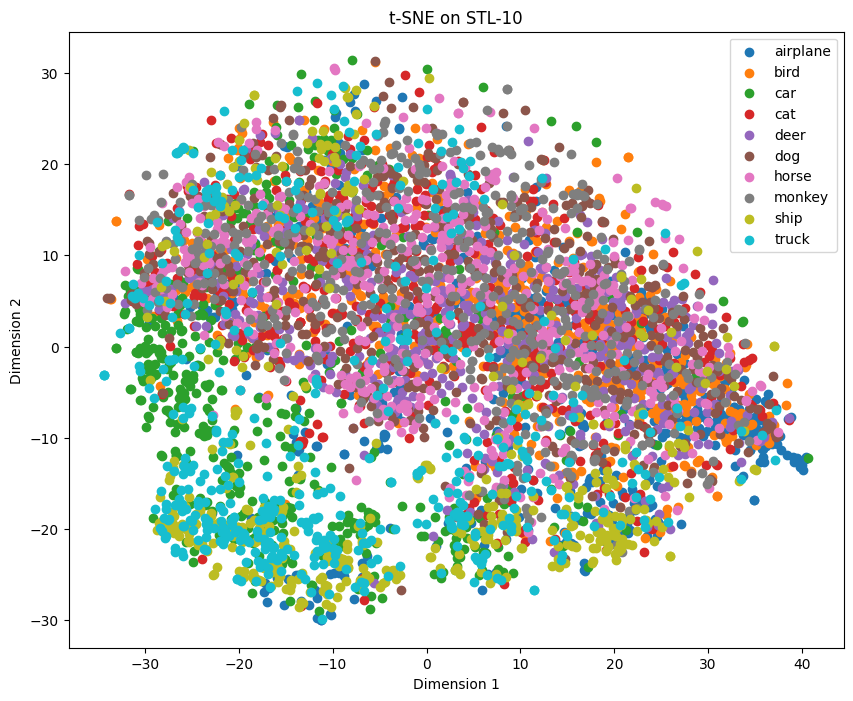

In [10]:
plt.figure(figsize=(10, 8))
categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"] # categorías en orden (1-10)

# Assuming you have 10 classes
for i in range(1, 11):
    mask = (Y == i)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=f'{categories[i]}')

plt.title('t-SNE on STL-10')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()